In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

In [3]:
mnist = pd.read_csv("../datasets/mnist_784.csv",dtype="int8")

# Separate Test Data

In [4]:
X = pd.DataFrame(mnist.iloc[:,:-1])
y = pd.DataFrame(mnist.iloc[:,-1:])

X_train, y_train = X.iloc[:60000], y.iloc[:60000]
X_test, y_test = X.iloc[60000:], y.iloc[60000:]

# Learn number 5

In [5]:
y_train_5 = y_train["class"]==5
y_test_5 = y_test["class"]==5

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

Models

In [7]:
#model = GradientBoostingClassifier(random_state=0)
#model = Perceptron(random_state=0)
#model = (LogisticRegression(random_state=0), "logisticreg")
#model = (LinearSVC(), "SVM")
#model = (RandomForestClassifier(), "RandomForest")
#model = (AdaBoostClassifier(random_state=0), "AdaBoost")
model = (DecisionTreeClassifier(), "DecisionTree")


Training

In [8]:
from sklearn.model_selection import cross_val_predict

#y_pred = model[0].fit(X_train, y_train_5).predict(X_train)
parameters = {"max_depth":[1,2,10,20,50], "min_samples_leaf":[5,10,50,100]}

clf = GridSearchCV(model[0], parameters, cv=3)

clf.fit(X_train,y_train_5)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 10, 20, 50],
                         'min_samples_leaf': [5, 10, 50, 100]})

[Text(100.89397928452638, 212.26285714285714, 'X[220] <= -0.5\ngini = 0.164\nsamples = 60000\nvalue = [54579, 5421]'),
 Text(7.37062542642711, 201.90857142857143, 'X[328] <= -0.5\ngini = 0.483\nsamples = 1640\nvalue = [667, 973]'),
 Text(2.1929133500113713, 191.5542857142857, 'X[355] <= -0.5\ngini = 0.044\nsamples = 491\nvalue = [480, 11]'),
 Text(0.9746281555606096, 181.2, 'X[324] <= -126.5\ngini = 0.005\nsamples = 436\nvalue = [435, 1]'),
 Text(0.4873140777803048, 170.84571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(1.4619422333409142, 170.84571428571428, 'gini = 0.0\nsamples = 435\nvalue = [435, 0]'),
 Text(3.4111985444621333, 181.2, 'X[353] <= 3.5\ngini = 0.298\nsamples = 55\nvalue = [45, 10]'),
 Text(2.436570388901524, 170.84571428571428, 'X[604] <= 19.5\ngini = 0.122\nsamples = 46\nvalue = [43, 3]'),
 Text(1.949256311121219, 160.49142857142857, 'gini = 0.0\nsamples = 42\nvalue = [42, 0]'),
 Text(2.9238844666818284, 160.49142857142857, 'X[652] <= 34.0\ngini = 0.37

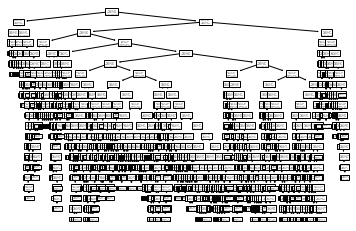

In [11]:
from sklearn import tree

tree.plot_tree(clf.best_estimator_)

Best Estimator

In [9]:
print(clf.best_params_)
clf.cv_results_

{'max_depth': 50, 'min_samples_leaf': 10}


{'mean_fit_time': array([ 2.09306765,  2.07304557,  2.10103901,  2.09508872,  3.57270734,
         3.53768229,  3.47341108,  3.67490506, 16.24900508, 14.02755682,
        12.21254937, 11.88443462, 22.55728229, 21.39655519, 18.44586412,
        17.11243264, 31.38363846, 28.00877388, 20.40022111, 17.33489744]),
 'std_fit_time': array([0.06332269, 0.04750996, 0.03539215, 0.01475209, 0.04778364,
        0.02694201, 0.02804412, 0.21703492, 0.67528839, 1.53955707,
        0.15259164, 0.14219438, 0.45879621, 0.6475213 , 0.39350191,
        0.30164891, 0.85252852, 0.558481  , 1.47852014, 0.19823672]),
 'mean_score_time': array([0.21286448, 0.20563936, 0.22947224, 0.20798866, 0.21536875,
        0.21133804, 0.2160364 , 0.22004811, 0.23927561, 0.188073  ,
        0.17789205, 0.18384234, 0.18408402, 0.17411558, 0.1976006 ,
        0.16565482, 0.19130476, 0.17320093, 0.17584324, 0.1978248 ]),
 'std_score_time': array([0.00879118, 0.01184746, 0.0168968 , 0.00875559, 0.00405178,
        0.00039688, 

In [11]:
print(list(range(len(clf.cv_results_["mean_test_score"]))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


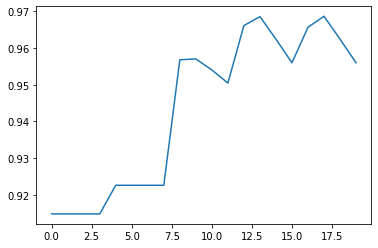

In [10]:
plt.plot(clf.cv_results_["mean_test_score"])

In [12]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_train)

conf_matrix = confusion_matrix(y_train_5, y_pred)

conf_matrix

array([[54312,   267],
       [  764,  4657]], dtype=int64)

In [13]:
y_test_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test_5, y_test_pred)

conf_matrix

array([[9010,   98],
       [ 176,  716]], dtype=int64)

Precision Recall

In [14]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

precision = precision_score(y_train_5, y_pred)
recall = recall_score(y_train_5, y_pred)
f1_scr = f1_score(y_train_5, y_pred)

print("Precision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1_scr)

Precision:  0.9457757920389926
Recall:  0.8590665928795426
F1_score:  0.9003383276945386


In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score

y_scores = clf.predict_proba(X_train)

In [34]:
y_scores

array([[0.0017452 , 0.9982548 ],
       [0.98901099, 0.01098901],
       [0.99557936, 0.00442064],
       ...,
       [0.0017452 , 0.9982548 ],
       [0.99498968, 0.00501032],
       [1.        , 0.        ]])

In [36]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores[:,1])

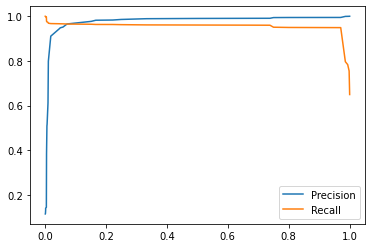

In [37]:
plt.plot(thresholds,precisions[:-1], label="Precision")
plt.plot(thresholds,recalls[:-1], label="Recall")
plt.legend()

Test Thresholds

In [38]:
threshold = 0.5

pred = y_scores[:,1]>threshold

precision = precision_score(y_train_5, pred)
recall = recall_score(y_train_5, pred)
f1_scr = f1_score(y_train_5, y_pred)

print("Precision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1_scr)

Precision:  0.9906737723639132
Recall:  0.9601549529607084
F1_score:  0.9751756440281031


ROC-AOC

ROC_AUC:  0.990134411123668


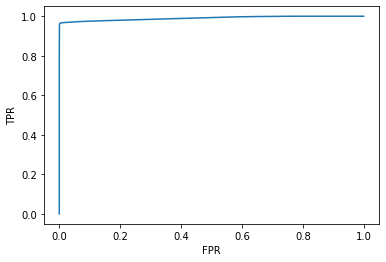

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores[:,1])

plt.plot(fpr, tpr)
axis = plt.gca()
axis.set_xlabel("FPR")
axis.set_ylabel("TPR")

roc_auc = roc_auc_score(y_train_5, y_scores[:,1])

print("ROC_AUC: ", roc_auc)

Save Stats

In [40]:
stats = pd.DataFrame(columns=["Model","Precision", "Recall", "F1_score", "ROC_AUC"])
stats.loc[len(stats)] = [model[1], precision, recall, f1_scr, roc_auc]
stats

,Model,Precision,Recall,F1_score,ROC_AUC
0,DecisionTree,0.990674,0.960155,0.975176,0.990134


In [41]:
import joblib

file = str(stats.loc[0,"Model"] + "_stats.pkl")

joblib.dump(stats, file)

['DecisionTree_stats.pkl']

Compare Performance

In [42]:
model_stats0 = joblib.load("Perceptronstats.pkl")
model_stats1 = joblib.load("logisticreg_stats.pkl")
model_stats2 = joblib.load("SVM_stats.pkl")
model_stats3 = joblib.load("RandomForest_stats.pkl")
model_stats4 = joblib.load("AdaBoost_stats.pkl")
model_stats5 = joblib.load("DecisionTree_stats.pkl")
print(model_stats0)
print(model_stats1)
print(model_stats2)
print(model_stats3)
print(model_stats4)
print(model_stats5)

        Model  Precision    Recall  F1_score   ROC_AUC
0  Perceptron   0.126807  0.199041  0.154917  0.550372
         Model  Precision    Recall  F1_score   ROC_AUC
0  logisticreg    0.46729  0.018447  0.035492  0.656258
  Model  Precision    Recall  F1_score  ROC_AUC
0   SVM   0.153906  0.110127  0.128387  0.52933
          Model  Precision    Recall  F1_score   ROC_AUC
0  RandomForest   0.990926  0.765541       1.0  0.996104
      Model  Precision    Recall  F1_score  ROC_AUC
0  AdaBoost   0.825207  0.586977   0.69372  0.95803
          Model  Precision    Recall  F1_score   ROC_AUC
0  DecisionTree   0.990674  0.960155  0.975176  0.990134
